In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. 데이터 읽어오기

In [146]:
df_train = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/ML_Team_Project/data/train.csv/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/ML_Team_Project/data/test.csv/test.csv')

df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [16]:
df_train.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df_train.duplicated().sum()

0

# 2. EDA

### 2-1. target 데이터와의 corr 확인

In [147]:
le = LabelEncoder()

l1 = df_train['Surname'].unique()
l2 = df_test['Surname'].unique()

l3 = np.hstack([l1,l2])

l_Surname = list(np.unique(l3))

le.fit(l_Surname)

df_train['num_Surname'] = le.transform(df_train['Surname'])

num_Surname_test = le.transform(df_test['Surname'])

In [148]:
le = LabelEncoder()

l1 = df_train['Geography'].unique()
l2 = df_test['Geography'].unique()

l3 = np.hstack([l1,l2])

l_Geography = list(np.unique(l3))

le.fit(l_Geography)

df_train['num_Geography'] = le.transform(df_train['Geography'])

num_Geography_test = le.transform(df_test['Geography'])

In [149]:
le = LabelEncoder()

l1 = df_train['Gender'].unique()
l2 = df_test['Gender'].unique()

l3 = np.hstack([l1,l2])

l_Gender = list(np.unique(l3))

le.fit(l_Gender)

df_train['num_Gender'] = le.transform(df_train['Gender'])

num_Gender_test = le.transform(df_test['Gender'])

In [101]:
features = list(df_train.columns)

features = [feature for feature in features if feature not in ['Surname', 'Geography', 'Gender', 'Exited']]

for f in features:
    print(f, ' : ', df_train[f].corr(df_train['Exited']))

id  :  0.0025122219616293528
CustomerId  :  -0.009946547888820776
CreditScore  :  -0.02738260006165175
Age  :  0.340768163407581
Tenure  :  -0.019564844484077446
Balance  :  0.1297428604840111
NumOfProducts  :  -0.21455423158490197
HasCrCard  :  -0.022141333072306892
IsActiveMember  :  -0.21023702579213635
EstimatedSalary  :  0.018826805670812914
num_Surname  :  -0.028247942315204003
num_Geography  :  0.05334343123704942
num_Gender  :  -0.14644155895393113


- --> Age, Balance, NumOfProducts, IsActiveMember, Gender 컬럼이 Exited와 비교적 상관관계가 있어보임

### 2-2. 컬럼 별 이탈률 확인

In [102]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

numeric_data.columns

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'num_Surname', 'num_Geography', 'num_Gender'],
      dtype='object')

In [103]:
categorical_data.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

- Surname

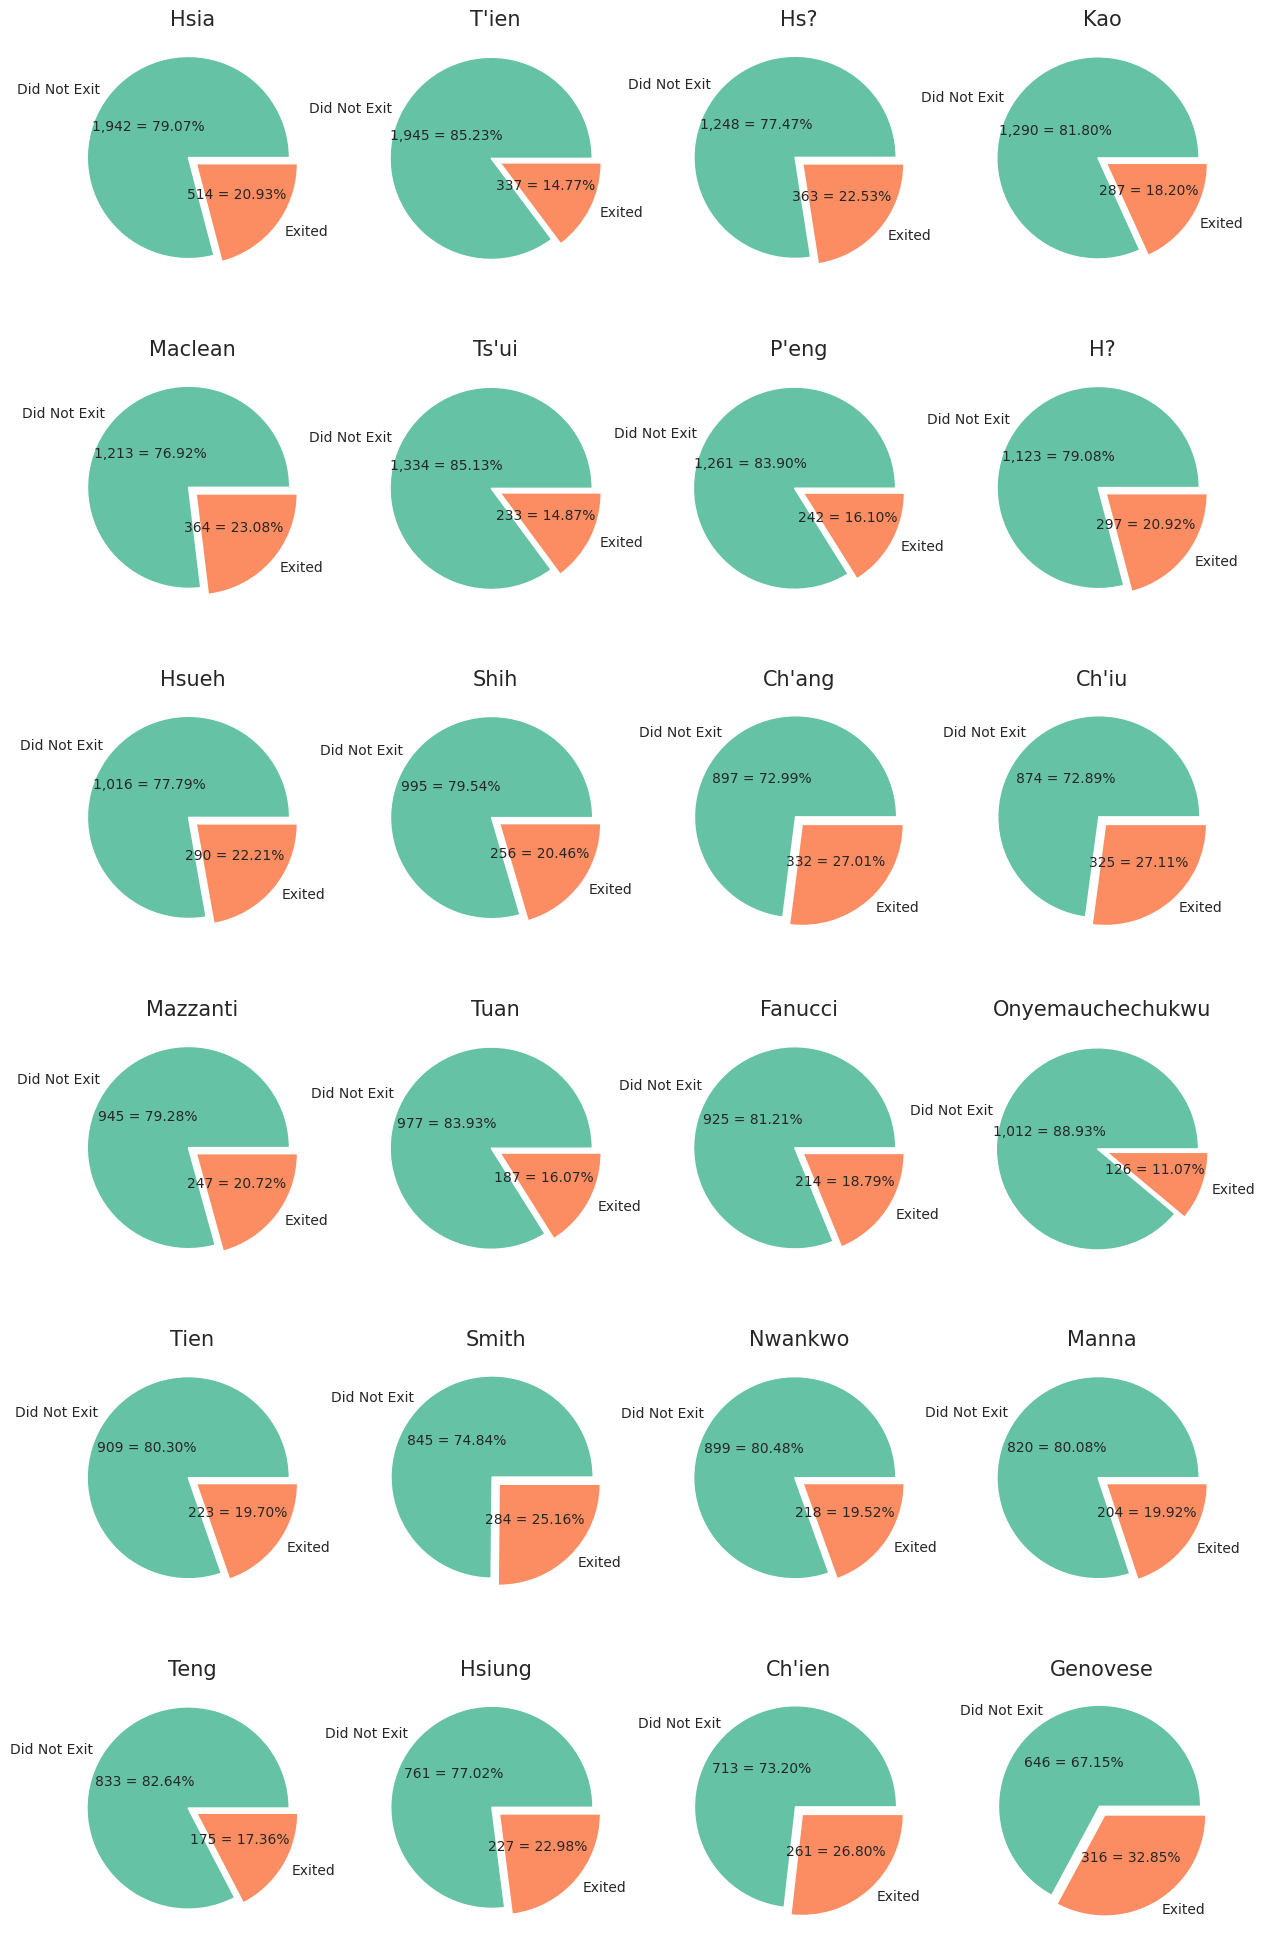

In [60]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(15, 25))

sns.set_style('darkgrid')
sns.set_palette('Set2')

top_surnames = [surname for surname in df_train["Surname"].value_counts().nlargest(24).index]
labels = top_surnames.copy()
axs = axs.flatten()

for ag, surname in enumerate(top_surnames):
    data = [
        df_train[(df_train["Exited"] == 0) & (df_train["Surname"] == surname)]["id"].count(),
        df_train[(df_train["Exited"] == 1) & (df_train["Surname"] == surname)]["id"].count()
    ]

    label = ["Did Not Exit", "Exited"]
    _ = axs[ag].pie(
        data, labels=label,
        autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
        explode=[0.05] * 2,
        pctdistance=0.5,
        colors=sns.color_palette("Set2")[0:2],
    )
    _ = axs[ag].set_title(f"{labels[ag]}", fontsize=15)

axs[5].set_axis_off()

- --> 성씨의 종류가 다양하니 이를 첫글자로만 나타내고 다시 확인해보자

- first letter of Surname

In [70]:
[name for name in df_train['Surname'].apply(lambda x : x[0]).value_counts().nlargest(24).index]

['C',
 'T',
 'H',
 'M',
 'O',
 'N',
 'L',
 'P',
 'S',
 'Y',
 'K',
 'B',
 'F',
 'G',
 'W',
 'U',
 'I',
 'R',
 'D',
 'A',
 'E',
 'Z',
 'J',
 'V']

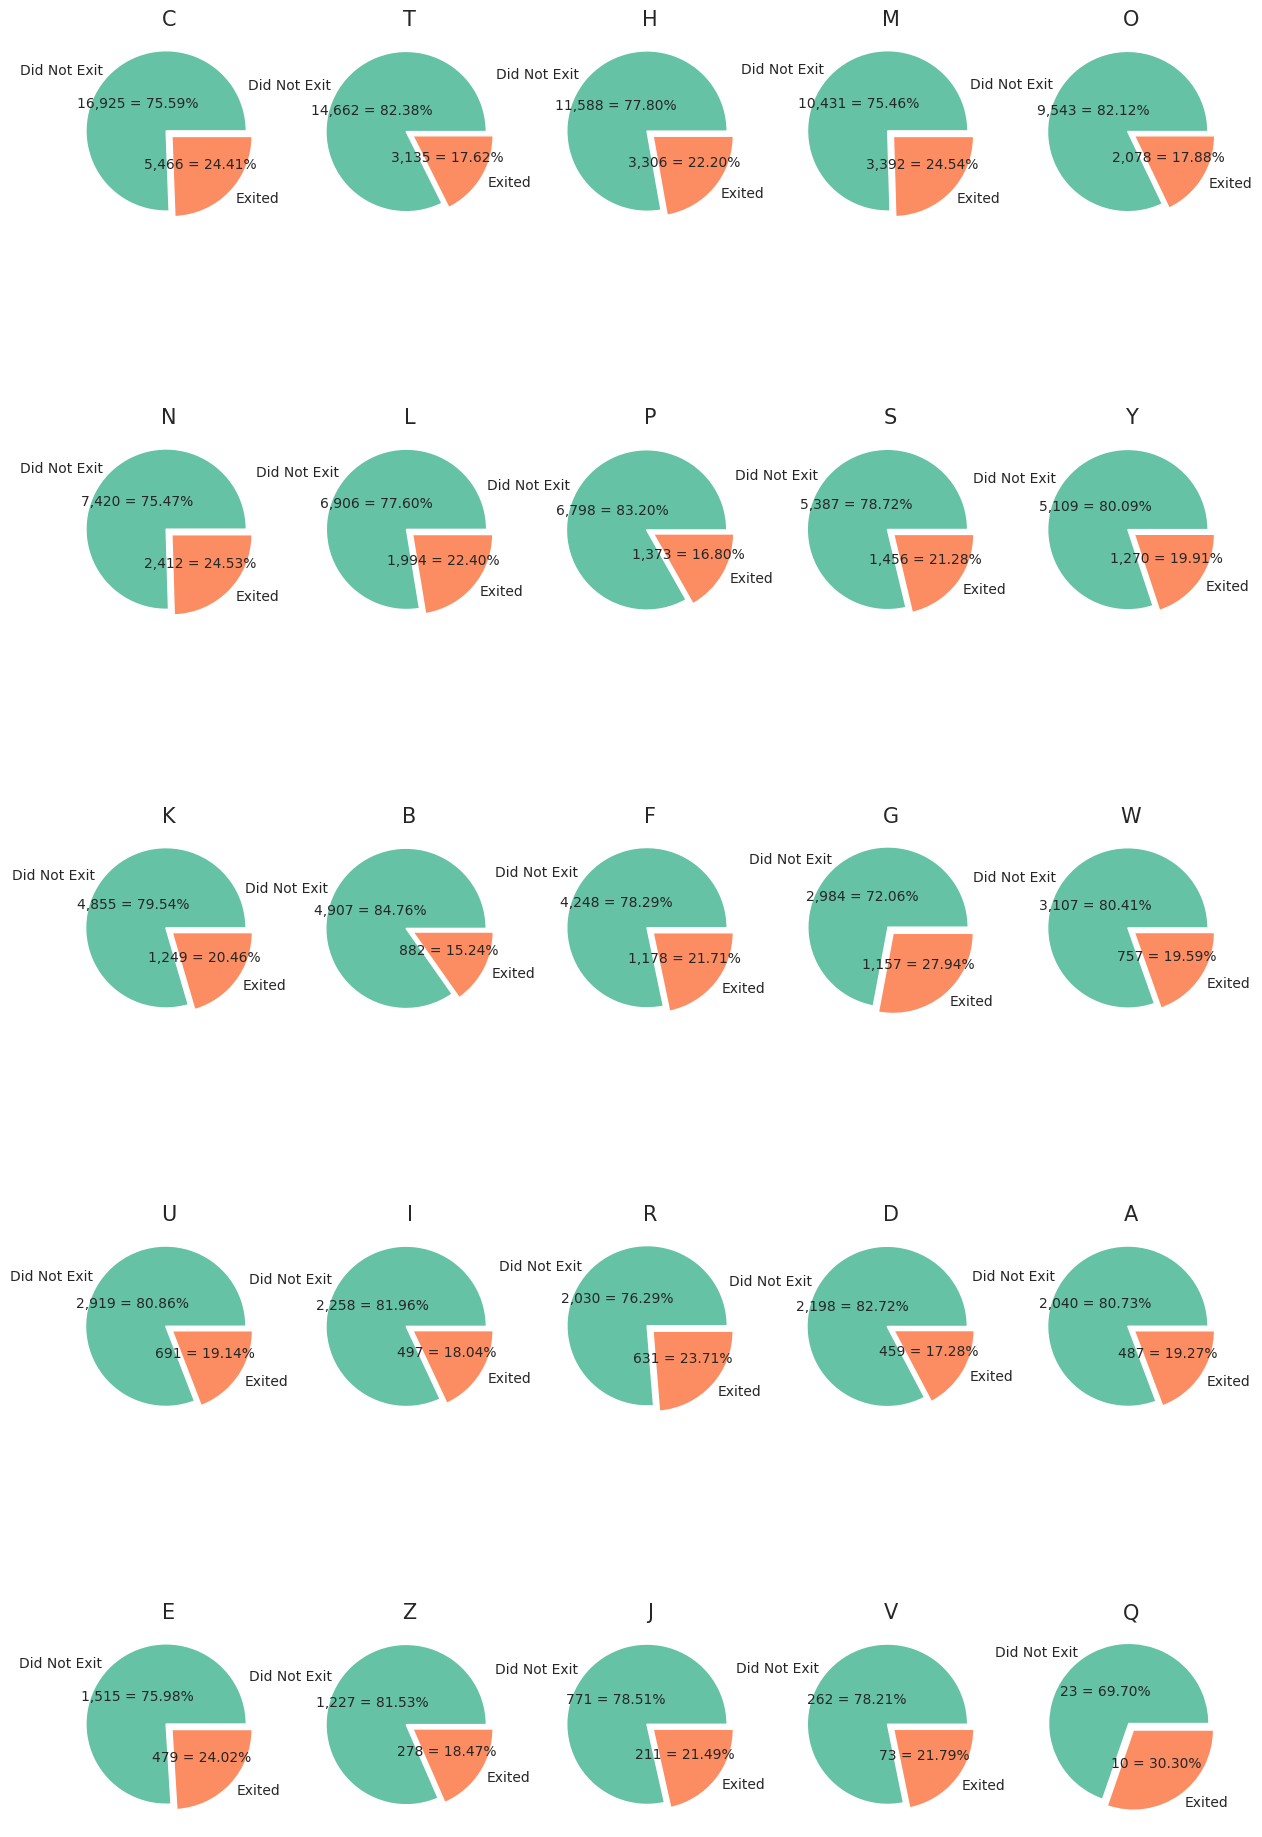

In [76]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 25))

df_train['First Letter of Surname'] = df_train['Surname'].apply(lambda x : x[0])

sns.set_style('darkgrid')
sns.set_palette('Set2')

top_firstletters = [firstletter for firstletter in df_train["Surname"].apply(lambda x : x[0]).value_counts().index]
labels = top_firstletters.copy()
axs = axs.flatten()

for ag, firstletter in enumerate(top_firstletters):

    data = [
        df_train[(df_train["Exited"] == 0) & (df_train['First Letter of Surname'] == firstletter)]["id"].count(),
        df_train[(df_train["Exited"] == 1) & (df_train['First Letter of Surname'] == firstletter)]["id"].count()
    ]

    label = ["Did Not Exit", "Exited"]

    _ = axs[ag].pie(
        data, labels=label,
        autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
        explode=[0.05] * 2,
        pctdistance=0.5,
        colors=sns.color_palette("Set2")[0:2],
    )
    _ = axs[ag].set_title(f"{labels[ag]}", fontsize=15)

axs[5].set_axis_off()

- --> 기존 Surname 컬럼 말고도 first letter of Surname 컬럼을 사용해볼 가치가 있어 보임

- Geography

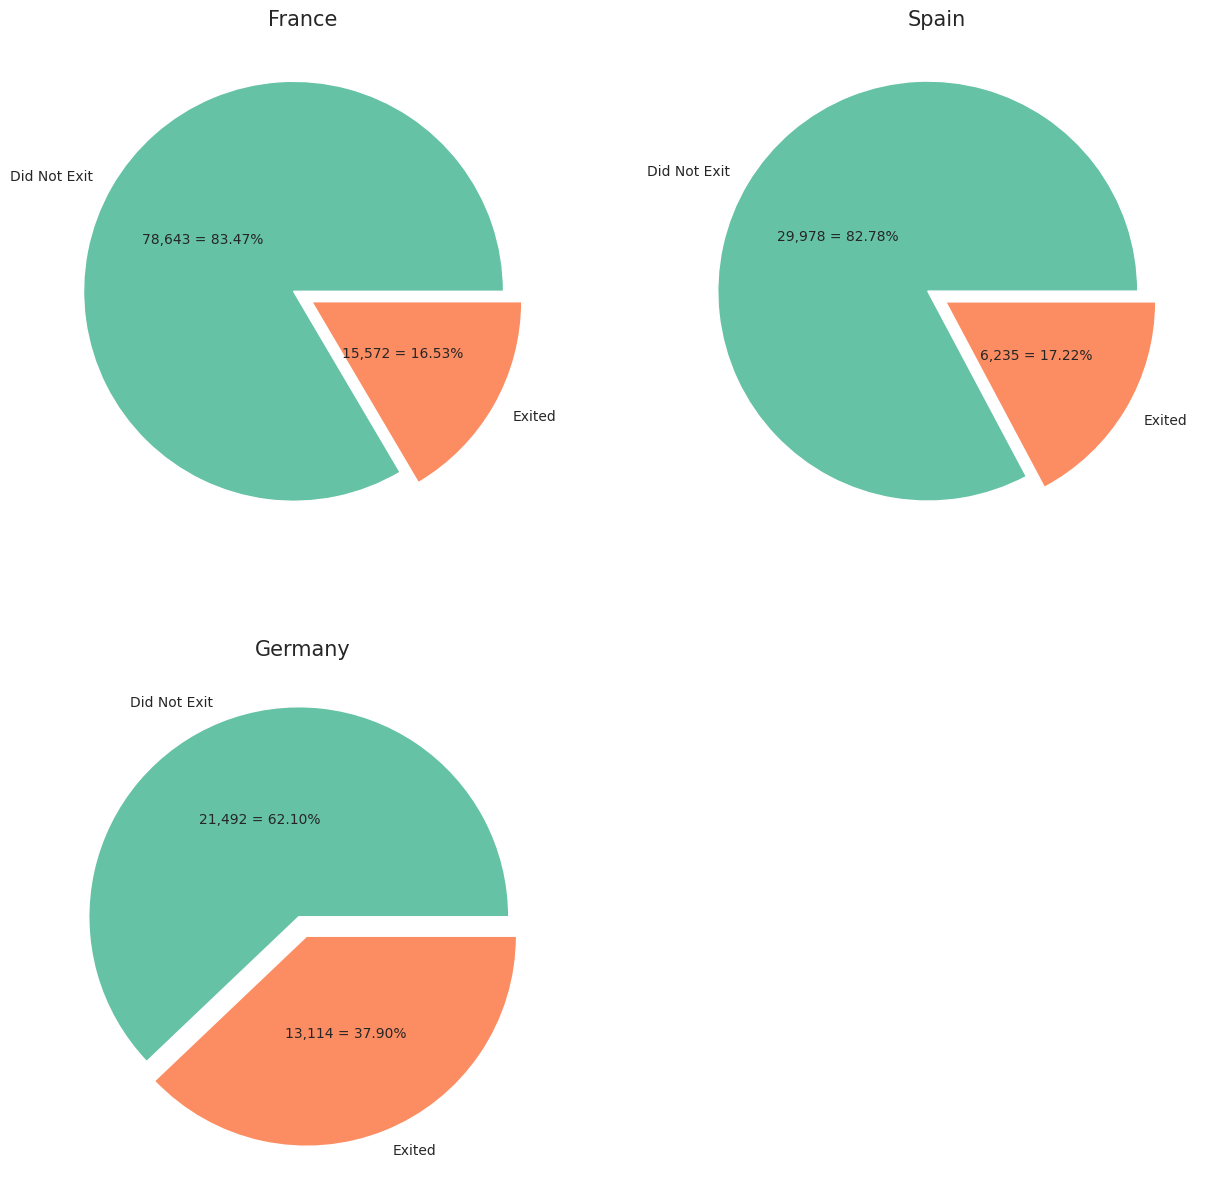

In [104]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

sns.set_style('darkgrid')
sns.set_palette('Set2')

geographies = [place for place in df_train['Geography'].unique()]
axs = axs.flatten()

for ag, geography in enumerate(geographies):
    data = [
        df_train[(df_train["Exited"] == 0) & (df_train["Geography"] == geography)]["id"].count(),
        df_train[(df_train["Exited"] == 1) & (df_train["Geography"] == geography)]["id"].count()
    ]

    label = ["Did Not Exit", "Exited"]
    _ = axs[ag].pie(
        data, labels=["Did Not Exit", "Exited"],
        autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
        explode=[0.05] * 2,
        pctdistance=0.5,
        colors=sns.color_palette("Set2")[0:2],
    )
    _ = axs[ag].set_title(f"{geography}", fontsize=15)

axs[3].set_axis_off()


- --> 독일이 다른 지역보다 은행을 떠나는 고객 수가 더 많다
- --> 하지만 corr을 살펴봤을 때, Geography가 Exited 컬럼과 강한 연결성을 보이지 않았으므로 Balance와 Exited와의 강한 상관 관계를 고려하여 "Balance"와 "Geography"를 함께 살펴보자

- Balance와 Geography

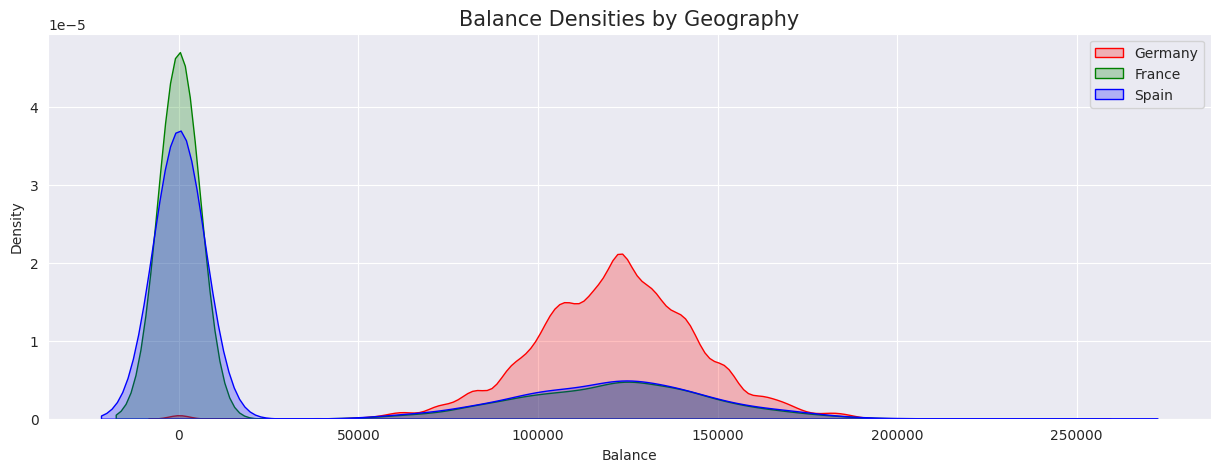

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

_ = sns.kdeplot(df_train[(df_train["Geography"] == "Germany")]["Balance"], fill=True, color="r", ax=axs, label="Germany")
_ = sns.kdeplot(df_train[(df_train["Geography"] == "France")]["Balance"], fill=True, color="g", ax=axs, label="France")
_ = sns.kdeplot(df_train[(df_train["Geography"] == "Spain")]["Balance"], fill=True, color="b", ax=axs, label="Spain")
_ = axs.set_title("Balance Densities by Geography", fontsize=15)
_ = axs.set_ylabel("Density")
_ = axs.set_xlabel("Balance")
_ = axs.legend()

plt.show();


- --> 확실히 지리적 위치에 따른 잔액의 분포에 차이가 있어 보이나 이것이 과연 Exited와의 연관성에 도움이 될까?
  - --> 잔액 0원이 가장 많은 지역은 프랑스이고, 비교적 높은 잔액은 독일에 많이 분포해있음
  - --> 지역 컬럼을 단독으로 이탈률을 확인해봤을 때에 프랑스,스페인,독일 순으로 커졌으므로 잔액과 지역 컬럼을 함께 고려한다면 도움이 될 수도 있을 것 같음

- Gender

In [110]:
df_train['Gender'].value_counts()

Male      93150
Female    71884
Name: Gender, dtype: int64

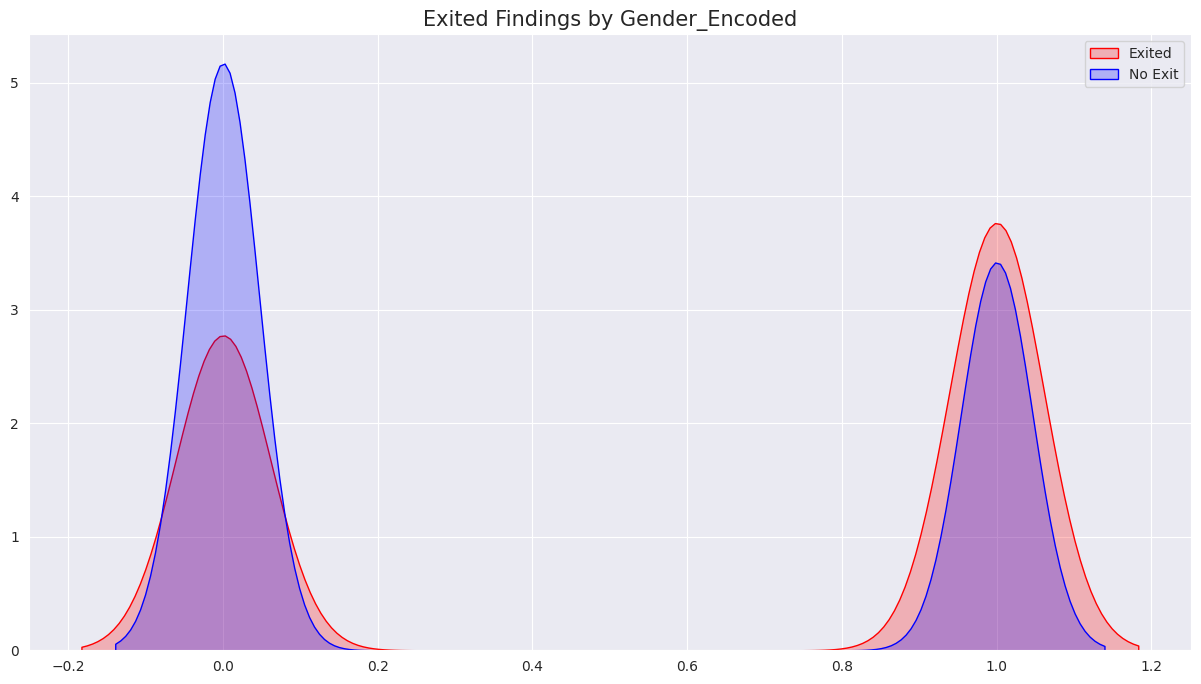

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

sns.set_style('darkgrid')

df_train["Gender_Encoded"] = df_train["Gender"].apply(lambda x: 0 if x == "Male" else 1)

_ = sns.kdeplot(df_train[(df_train["Exited"] == 1)]["Gender_Encoded"], fill=True, color="r", ax=ax, label="Exited")
_ = sns.kdeplot(df_train[(df_train["Exited"] == 0)]["Gender_Encoded"], fill=True, color="b", ax=ax, label="No Exit")
_ = ax.set_title("Exited Findings by Gender_Encoded", fontsize=15)
_ = ax.set_ylabel("")
_ = ax.set_xlabel("")
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles=handles[0:2], labels=labels[0:2], title="")

- --> 남성의 경우 여성보다 이탈률이 더 높다는 것을 알 수 있음

- Age

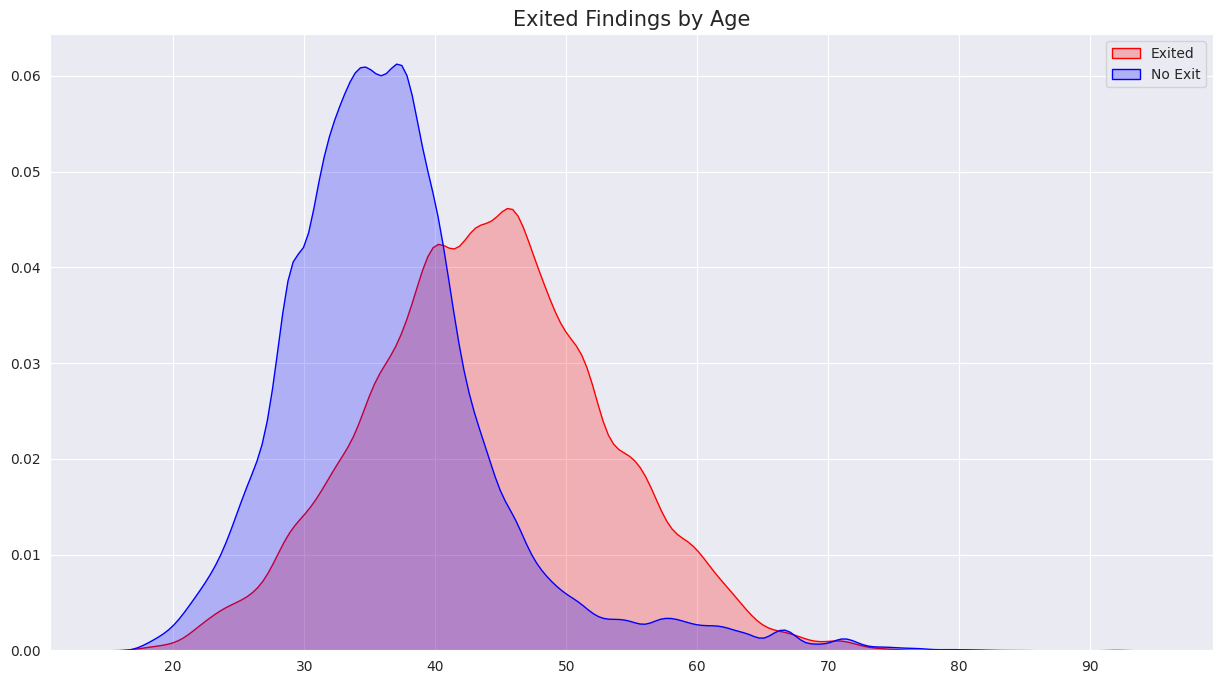

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

sns.set_style('darkgrid')

_ = sns.kdeplot(df_train[(df_train["Exited"] == 1)]["Age"], fill=True, color="r", ax=ax, label="Exited")
_ = sns.kdeplot(df_train[(df_train["Exited"] == 0)]["Age"], fill=True, color="b", ax=ax, label="No Exit")
_ = ax.set_title("Exited Findings by Age", fontsize=15)
_ = ax.set_ylabel("")
_ = ax.set_xlabel("")
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles=handles[0:2], labels=labels[0:2], title="")

- --> 25세에서 35세 사이의 고객은 은행에 남을 가능성이 높으며, 반면에 40세에서 65세 사이의 고객은 더 자주 이탈하는 경향이 있음
--> 이 결과는 Age와 Exited가 강한 상관 관계를 갖고 있음을 나타내는 Spearman 상관 관계와 일관성이 있음

- Number of products와 Age

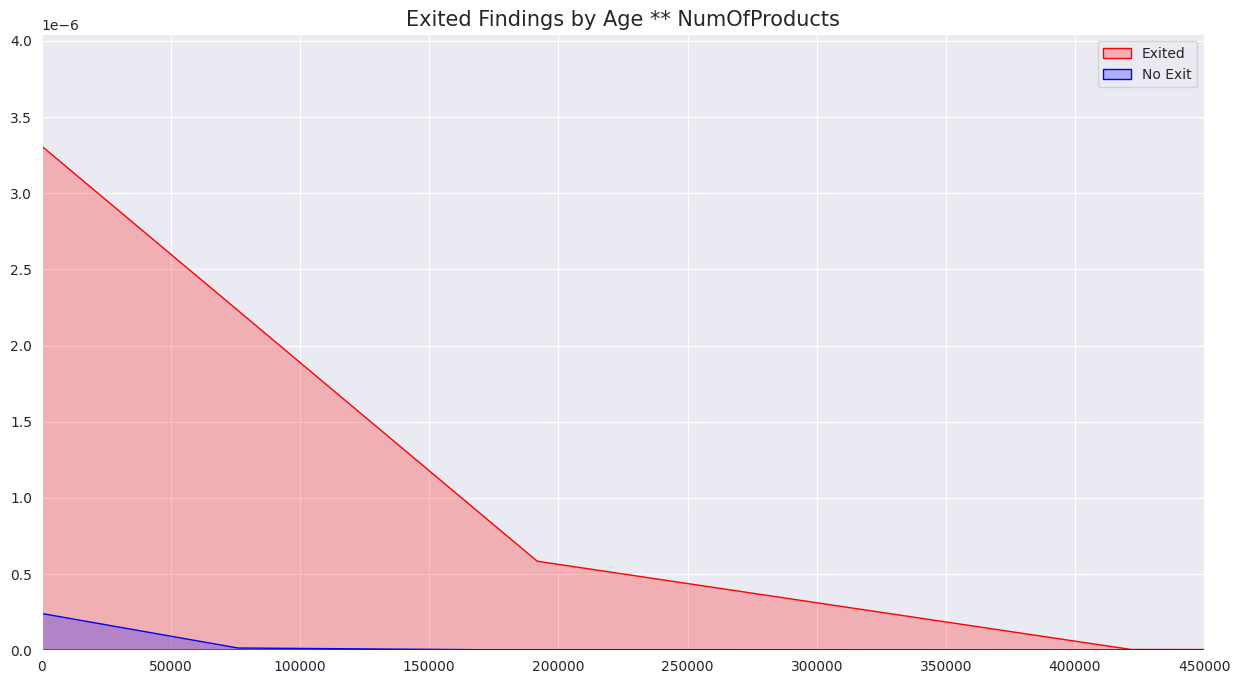

In [112]:
df_train["Age_NumOfProducts"] = df_train["Age"] ** df_train["NumOfProducts"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

sns.set_style('darkgrid')

_ = sns.kdeplot(df_train[(df_train["Exited"] == 1)]["Age_NumOfProducts"], fill=True, color="r", ax=ax, label="Exited")
_ = sns.kdeplot(df_train[(df_train["Exited"] == 0)]["Age_NumOfProducts"], fill=True, color="b", ax=ax, label="No Exit")
_ = ax.set_title("Exited Findings by Age ** NumOfProducts", fontsize=15)
_ = ax.set_ylabel("")
_ = ax.set_xlabel("")
_ = ax.set_xlim(0, 0.045e7)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles=handles[0:2], labels=labels[0:2], title="")

- --> 해당 변수의 값이 높아질 수록 이탈률이 낮아지는 경향이 보임

- Balance

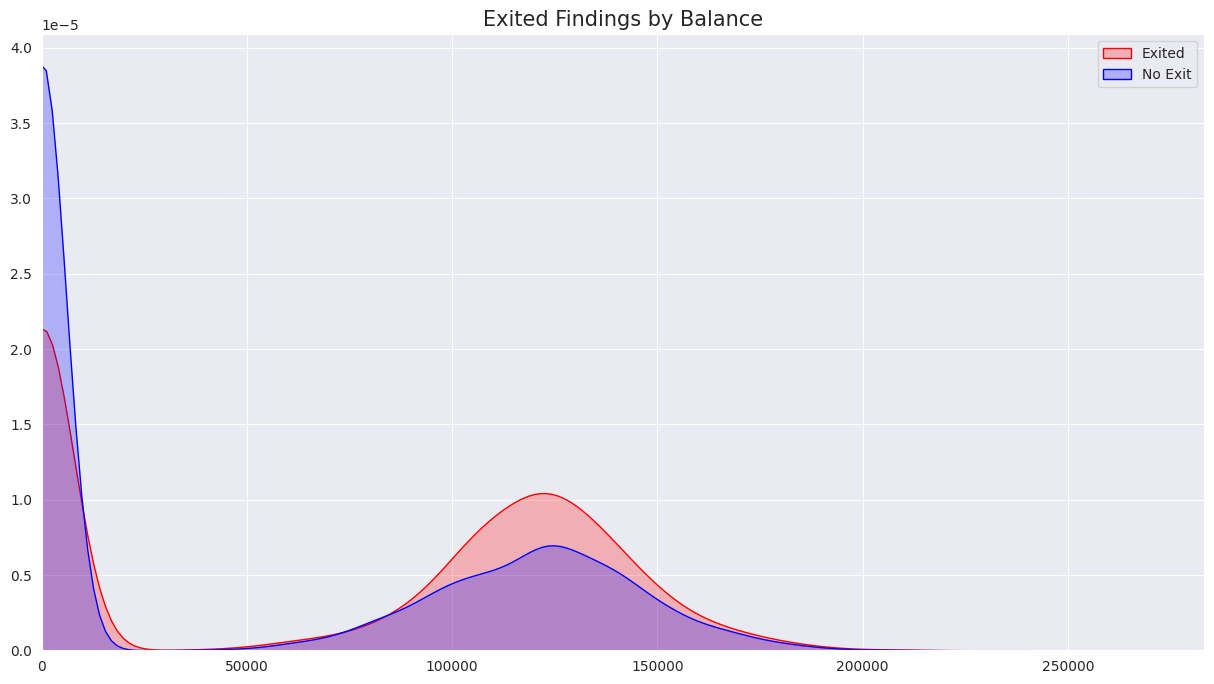

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

sns.set_style('darkgrid')

_ = sns.kdeplot(df_train[(df_train["Exited"] == 1)]["Balance"], fill=True, color="r", ax=ax, label="Exited")
_ = sns.kdeplot(df_train[(df_train["Exited"] == 0)]["Balance"], fill=True, color="b", ax=ax, label="No Exit")
_ = ax.set_title("Exited Findings by Balance", fontsize=15)
_ = ax.set_ylabel("")
_ = ax.set_xlabel("")
_ = ax.set_xlim(0)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles=handles[0:2], labels=labels[0:2], title="")

In [119]:
df_train['Balance'].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

- --> 잔액이 0원인 사람의 데이터가 가장 많으며 이때는 이탈률이 가장 낮다
- --> 잔액이 100000~150000 사이인 데이터에서는 이탈률이 이탈하지 않은 사람의 비율보다 더 높았음
- --> 잔액이 많을 수록 이탈률이 높은가?

- NumOfProducts

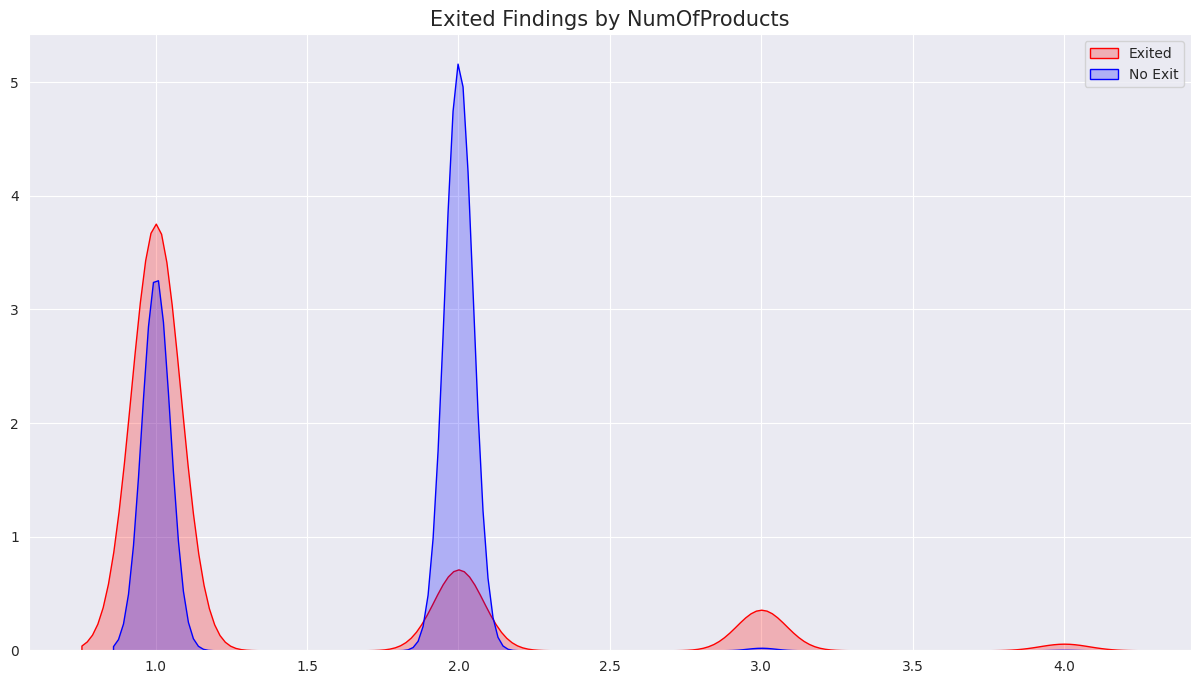

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

sns.set_style('darkgrid')

_ = sns.kdeplot(df_train[(df_train["Exited"] == 1)]["NumOfProducts"], fill=True, color="r", ax=ax, label="Exited")
_ = sns.kdeplot(df_train[(df_train["Exited"] == 0)]["NumOfProducts"], fill=True, color="b", ax=ax, label="No Exit")
_ = ax.set_title("Exited Findings by NumOfProducts", fontsize=15)
_ = ax.set_ylabel("")
_ = ax.set_xlabel("")
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles=handles[0:2], labels=labels[0:2], title="")

In [118]:
df_train['NumOfProducts'].value_counts()

2    84291
1    77374
3     2894
4      475
Name: NumOfProducts, dtype: int64

In [122]:
df_train[df_train['NumOfProducts'] == 4]['Exited'].value_counts()

1    416
0     59
Name: Exited, dtype: int64

- --> 데이터의 불균형이 심하기 때문에 정확한 판단은 어렵지만 1,2일 때를 비교했을 때에 2개일 때가 더 이탈률이 현저히 낮을 것을 볼 수 있음
- --> 또한 4일 떄에는 거의 8배에 달하는 사람들이 이탈한 것을 알 수 있음

- IsActiveMember

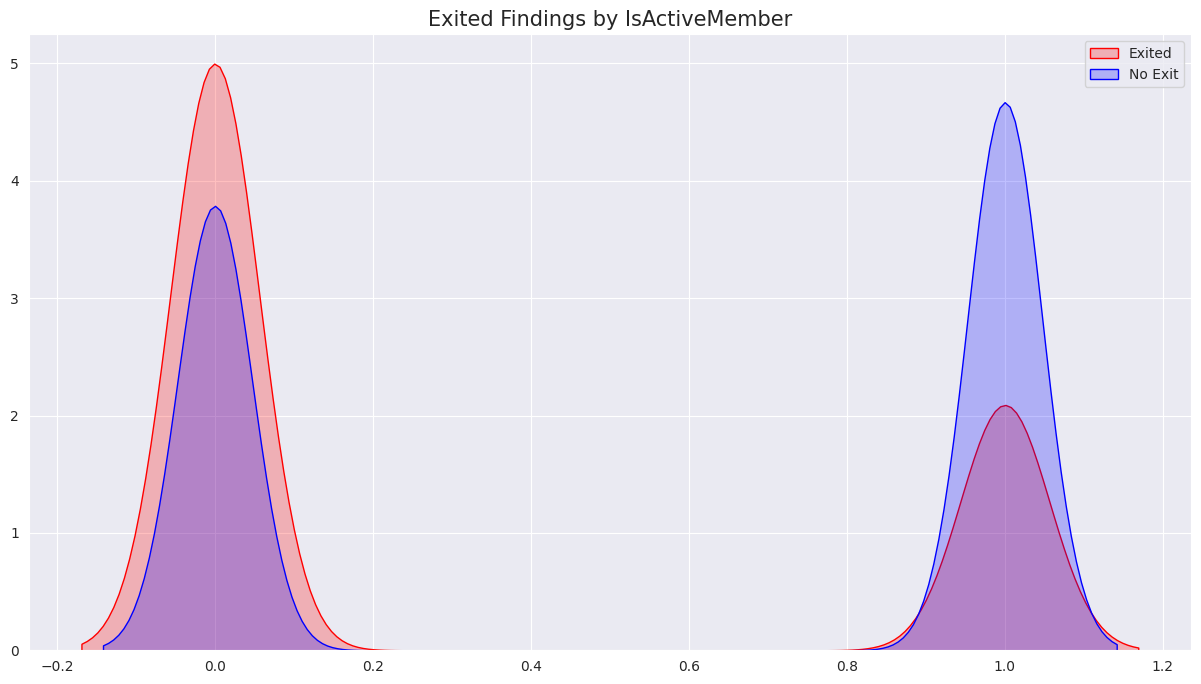

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

sns.set_style('darkgrid')

_ = sns.kdeplot(df_train[(df_train["Exited"] == 1)]["IsActiveMember"], fill=True, color="r", ax=ax, label="Exited")
_ = sns.kdeplot(df_train[(df_train["Exited"] == 0)]["IsActiveMember"], fill=True, color="b", ax=ax, label="No Exit")
_ = ax.set_title("Exited Findings by IsActiveMember", fontsize=15)
_ = ax.set_ylabel("")
_ = ax.set_xlabel("")
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles=handles[0:2], labels=labels[0:2], title="")

In [124]:
df_train['IsActiveMember'].value_counts()

0.0    82885
1.0    82149
Name: IsActiveMember, dtype: int64

- --> 금융활동이 활발한 사람일수록 이탈률이 낮을 것을 알 수 있음
- --> corr의 결과와 비슷한 형태를 보이고 있음

# 3. 데이터 전처리

In [150]:
y = df_train['Exited']

In [152]:
df_train = df_train.drop(['Surname', 'Geography', 'Gender_Encoded', 'Gender', 'Exited'], axis=1)

In [153]:
df_train.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,num_Surname,num_Geography,num_Gender
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,1992,0,1
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,1993,0,1
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,1217,0,1
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1341,0,1
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,483,2,1


In [154]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((132027, 13), (33007, 13), (132027,), (33007,))

In [155]:
X_train.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,num_Surname,num_Geography,num_Gender
149380,149380,15780088,679,41.0,9,0.00,2,1.0,1.0,103560.98,2849,0,1
164766,164766,15679760,721,46.0,9,115764.32,2,1.0,0.0,102950.79,2429,0,1
155569,155569,15637678,551,35.0,5,0.00,1,1.0,0.0,155394.52,1595,0,1
124304,124304,15728693,743,31.0,3,57866.03,2,1.0,1.0,107428.42,942,2,0
108008,108008,15613673,675,28.0,2,0.00,2,1.0,0.0,134110.93,1589,0,1


### 3-1. 오버 샘플링

0    104061
1    104061
Name: Target, dtype: int64

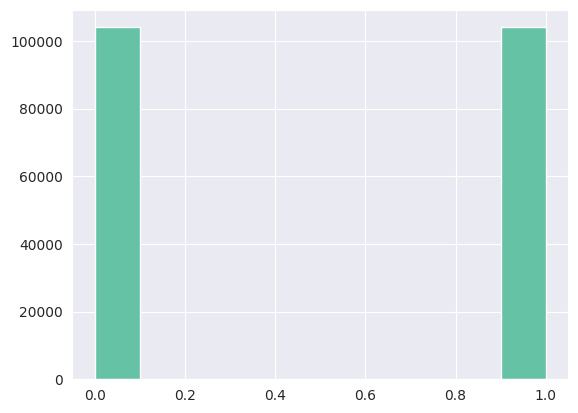

In [156]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.Series(y_resampled, name='Target')], axis=1)

resampled_data['Target'].hist()
resampled_data['Target'].value_counts()

In [157]:
resampled_data_corr = resampled_data.corr()
resampled_data_corr["Target"].sort_values(ascending = False)

Target             1.000000
Age                0.397914
Balance            0.155800
num_Geography      0.066778
EstimatedSalary    0.022192
id                 0.003469
CustomerId        -0.015374
Tenure            -0.021458
HasCrCard         -0.025815
CreditScore       -0.031704
num_Surname       -0.038596
num_Gender        -0.177762
NumOfProducts     -0.242260
IsActiveMember    -0.260625
Name: Target, dtype: float64

In [177]:
cols = ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'num_Surname', 'num_Geography', 'num_Gender', 'Target']

In [179]:
resampled_X = resampled_data[cols].iloc[:,:-1]
resampled_y = resampled_data['Target']

# 4. 모델링

In [163]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

In [165]:
def evaluate(y_real, y_pred, y_prob):

    acc = accuracy_score(y_real, y_pred)
    pre = precision_score(y_real, y_pred)
    rec = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    f2 = f_score(1.5,y_real, y_pred)
    f3 = f_score(2,y_real, y_pred)
    auc1 = average_precision_score(y_real, y_prob)
    auc2 = roc_auc_score(y_real, y_prob)

    print('Accuracy : {:.6f}'.format(acc)) #정확도 : 예측이 정답과 얼마나 정확한가
    print('Precision : {:.6f}'.format(pre)) #정밀도 : 예측한 것 중에서 정답의 비율
    print('Recall : {:.6f}'.format(rec)) #재현율 : 정답 중에서 예측한 것의 비율
    print('F1 score : {:.6f}'.format(f1)) #정밀도와 재현율의 (조화)평균 - 정밀도와 재현율이 비슷할수록 높은 점수
    print('F1.5 score : {:.6f}'.format(f2))
    print('F2 score : {:.6f}'.format(f3))
    print('PR curve_auc score : {:.6f}'.format(auc1))
    print('ROC curve_auc score : {:.6f}'.format(auc2))
    print('\nConfusion Matrix : \n {}'.format(confusion_matrix(y_real, y_pred, labels = [1,0]))) # labels를 설정해주지 않으면 순서가 바뀜

    score_list = [acc,pre,rec,f1,f2,f3,auc1,auc2]
    score_box = np.array(score_list)

    return score_box

In [166]:
def graph_f_score(i,j,k,y_real,y_pred):

    x_range = np.arange(i,j,k)
    score = []

    for kk in x_range:
        score.append(f_score(kk,y_real,y_pred))

    score = np.array(score)
    plt.figure(figsize=(10,5))
    plt.plot(x_range, score,'-o')
    plt.title('F-score by weight')
    plt.xlabel('weight')
    plt.ylabel('f-score')

In [167]:
def precision_recall_thresholds(y_val, y_prob):

    precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob)
    plt.figure(figsize = (15,5))
    plt.plot(thresholds, recalls[:-1], color = 'red', label = 'recall')
    plt.plot(thresholds, precisions[:-1], color = 'blue', label = 'precision')
    plt.title('thresholds VS recalls VS precisions')
    plt.xlabel('thresholds')
    plt.legend(loc = 'best')

In [168]:
def plot_pr_curve(y_val, y_prob):

    precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob)
    pr_auc = average_precision_score(y_val, y_prob)
    plt.title('Precision-Recall Curve')
    plt.plot(recalls, precisions, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    b_line = len(y_val[y_val==1]) / len(y_val)
    plt.plot([0, 1], [b_line, b_line], "r--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

In [169]:
def plot_roc_curve(y_val, y_prob):

    fpr, tpr, threshold = roc_curve(y_val, y_prob)
    roc_auc = roc_auc_score(y_val, y_prob)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### 4-1. 기존 컬럼만 사용

- lightGBM

In [162]:
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [182]:
model = LGBMClassifier(random_state=42,
                        objective="binary",
                        metric="auc",
                        n_jobs=-1,
                        n_estimators=5000,
                        verbose=-1)

model.fit(resampled_X,
          resampled_y,
          eval_set=[(X_test[features], y_test)],
          callbacks=[
          early_stopping(50, verbose=False),
          log_evaluation(5000)])

y_pre = model.predict(X_test)
probs = model.predict_proba(X_test)
y_prob = probs[:,1]

- 모델 평가 지표

Accuracy : 0.817766
Precision : 0.546850
Recall : 0.788785
F1 score : 0.645906
F1.5 score : 0.694275
F2 score : 0.724664
PR curve_auc score : 0.734574
ROC curve_auc score : 0.892407

Confusion Matrix : 
 [[ 5486  1469]
 [ 4546 21506]]


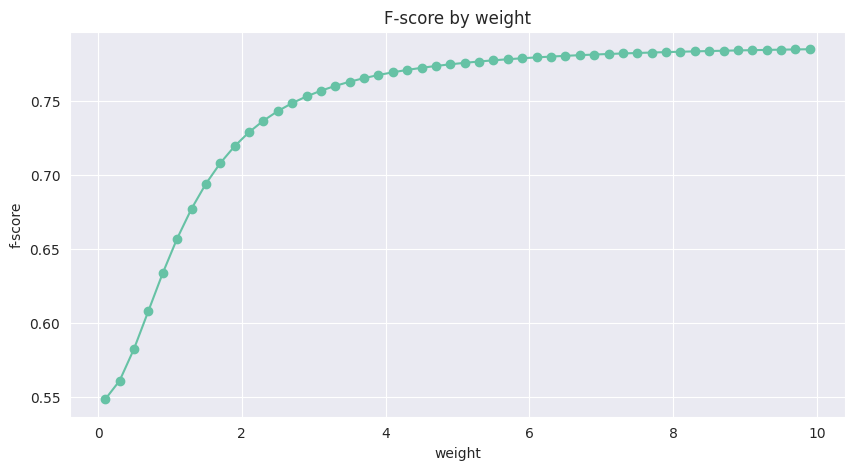

In [184]:
evaluate(y_test, y_pre, y_prob)

- 최적의 매개변수 구하기

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [191]:
param_grid = {'booster': ['gbtree'],
             'objective' : ['binary'],
             'learning_rate':[0.01,0.05],
              'num_leaves' : [12,15,18]}

grid = GridSearchCV(estimator = LGBMClassifier(), param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=3,)

grid_result = grid.fit(resampled_X, resampled_y)

print('best parameter : {}'.format(grid.best_params_))
print('best score of CV : {:.3f}'.format(grid.best_score_)) # 교차검증의 평균 정확도
print('best score of test set : {:.3f}'.format(grid.score(X_test,y_test)))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Info] Number of positive: 104061, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 208122, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
best parameter : {'booster': 'gbtree', 'learning_rate': 0.05, 'num_leaves': 18, 'objective': 'binary'}
best score of CV : 0.808
[LightGBM] [Warning] Unknown parameter: booster
best score of test set : 0.812


- --> 기존 컬럼을 모두 사용하고, lightGBM 모델을 사용했을 떄에 성능이 0.812로 데이터 수가 많은 것에 비해서는 성능이 그리 좋아 보이지 않음

- 테스트

In [192]:
y_pred = grid_result.predict(X_test)

probs = grid_result.predict_proba(X_test)
y_prob = probs[:,1]

evaluate(y_test, y_pred, y_prob)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
Accuracy : 0.811616
Precision : 0.535787
Recall : 0.793242
F1 score : 0.639578
F1.5 score : 0.691067
F2 score : 0.723693
PR curve_auc score : 0.728771
ROC curve_auc score : 0.890258

Confusion Matrix : 
 [[ 5517  1438]
 [ 4780 21272]]


array([0.81161572, 0.53578712, 0.79324227, 0.63957802, 0.69106694,
       0.72369284, 0.72877069, 0.89025762])

- --> 심지어 accuracy가 테스트 데이터에 대해서는 성능이 더 떨어진 것을 볼 수 있음

### 4-2. 기존 컬럼 일부 + First Letter Surname

- First Letter Surname Group

In [225]:
df_train = pd.read_csv('/content/drive/MyDrive/ML_PROJECT/ML_Team_Project/data/train.csv/train.csv')

# 라벨인코딩 1
le = LabelEncoder()

l1 = df_train['Surname'].unique()
l2 = df_test['Surname'].unique()

l3 = np.hstack([l1,l2])

l_Surname = list(np.unique(l3))

le.fit(l_Surname)

df_train['num_Surname'] = le.transform(df_train['Surname'])

# 라벨인코딩 2
le = LabelEncoder()

l1 = df_train['Geography'].unique()
l2 = df_test['Geography'].unique()

l3 = np.hstack([l1,l2])

l_Geography = list(np.unique(l3))

le.fit(l_Geography)

df_train['num_Geography'] = le.transform(df_train['Geography'])

num_Geography_test = le.transform(df_test['Geography'])

# 라벨인코딩 3
le = LabelEncoder()

l1 = df_train['Gender'].unique()
l2 = df_test['Gender'].unique()

l3 = np.hstack([l1,l2])

l_Gender = list(np.unique(l3))

le.fit(l_Gender)

df_train['num_Gender'] = le.transform(df_train['Gender'])

num_Gender_test = le.transform(df_test['Gender'])

In [226]:
df_train_copy = df_train.copy()

In [227]:
df_train_copy['First Letter of Surname'] = df_train_copy['Surname'].apply(lambda x : x[0])

In [229]:
# 라벨인코딩 4
le = LabelEncoder()

l1 = df_train_copy['First Letter of Surname'].unique()
df_test['First Letter of Surname'] = [name[0] for name in df_test['Surname']]
l2 = df_test['First Letter of Surname'].unique()

l3 = np.hstack([l1,l2])

l_Surname = list(np.unique(l3))

le.fit(l_Surname)

df_train_copy['First Letter of Surname'] = le.transform(df_train_copy['First Letter of Surname'])

In [230]:
df_train_copy = df_train_copy.drop(['Surname', 'num_Surname','Geography', 'Gender'], axis=1)

In [231]:
df_train_copy.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,num_Geography,num_Gender,First Letter of Surname
0,0,15674932,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,1,14
1,1,15749177,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,1,14
2,2,15694510,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,1,7
3,3,15741417,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,1,10
4,4,15766172,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,2,1,2


In [232]:
y = df_train_copy['Exited']
df_train_copy = df_train_copy.drop('Exited', axis=1)

- 데이터 나누기

In [233]:
X_train, X_test, y_train, y_test = train_test_split(df_train_copy, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((132027, 13), (33007, 13), (132027,), (33007,))

- 오버 샘플링

In [234]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [235]:
X_resampled.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,num_Geography,num_Gender,First Letter of Surname
0,149380,15780088,679,41.0,9,0.00,2,1.0,1.0,103560.98,0,1,23
1,164766,15679760,721,46.0,9,115764.32,2,1.0,0.0,102950.79,0,1,18
2,155569,15637678,551,35.0,5,0.00,1,1.0,0.0,155394.52,0,1,12
3,124304,15728693,743,31.0,3,57866.03,2,1.0,1.0,107428.42,2,0,6
4,108008,15613673,675,28.0,2,0.00,2,1.0,0.0,134110.93,0,1,11


In [236]:
X_test.head()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,num_Geography,num_Gender,First Letter of Surname
33042,33042,15752375,798,31.0,8,102075.88,1,1.0,0.0,79577.48,0,0,2
36330,36330,15742681,629,26.0,6,0.00,2,1.0,0.0,38190.78,0,1,15
59446,59446,15730397,565,39.0,7,115163.32,3,1.0,0.0,69052.63,0,1,15
92278,92278,15803365,653,55.0,2,70263.83,1,0.0,0.0,62347.71,2,1,2
146750,146750,15735270,557,31.0,6,106596.29,1,1.0,0.0,91305.77,0,0,7


In [237]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208122 entries, 0 to 208121
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       208122 non-null  int64  
 1   CustomerId               208122 non-null  int64  
 2   CreditScore              208122 non-null  int64  
 3   Age                      208122 non-null  float64
 4   Tenure                   208122 non-null  int64  
 5   Balance                  208122 non-null  float64
 6   NumOfProducts            208122 non-null  int64  
 7   HasCrCard                208122 non-null  float64
 8   IsActiveMember           208122 non-null  float64
 9   EstimatedSalary          208122 non-null  float64
 10  num_Geography            208122 non-null  int64  
 11  num_Gender               208122 non-null  int64  
 12  First Letter of Surname  208122 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 20.6 MB


- 모델링

In [238]:
model = LGBMClassifier(random_state=42,
                        objective="binary",
                        metric="auc",
                        n_jobs=-1,
                        n_estimators=5000,
                        verbose=-1)

model.fit(X_resampled,
          y_resampled,
          eval_set=[(X_test, y_test)],
          callbacks=[
          early_stopping(50, verbose=False),
          log_evaluation(5000)])

y_pre = model.predict(X_test)
probs = model.predict_proba(X_test)
y_prob = probs[:,1]

- 평가 지표

In [248]:
evaluate(y_test, y_pre, y_prob)

Accuracy : 0.814585
Precision : 0.541145
Recall : 0.789504
F1 score : 0.642147
F1.5 score : 0.691810
F2 score : 0.723128
PR curve_auc score : 0.728033
ROC curve_auc score : 0.889941

Confusion Matrix : 
 [[ 5491  1464]
 [ 4656 21396]]


array([0.81458479, 0.54114517, 0.78950395, 0.64214712, 0.6918097 ,
       0.72312798, 0.72803302, 0.88994105])

- 최적의 매개변수 구하기

In [247]:
param_grid = {'booster': ['gbtree'],
             'objective' : ['binary'],
             'learning_rate':[0.01,0.05],
              'num_leaves' : [12,15,18]}

grid = GridSearchCV(estimator = LGBMClassifier(), param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=3,)

grid_result = grid.fit(X_resampled, y_resampled)

print('best parameter : {}'.format(grid.best_params_))
print('best score of CV : {:.3f}'.format(grid.best_score_)) # 교차검증의 평균 정확도
print('best score of test set : {:.3f}'.format(grid.score(X_test,y_test)))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Info] Number of positive: 104061, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 208122, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
best parameter : {'booster': 'gbtree', 'learning_rate': 0.05, 'num_leaves': 18, 'objective': 'binary'}
best score of CV : 0.808
[LightGBM] [Warning] Unknown parameter: booster
best score of test set : 0.812


- 테스트

In [244]:
y_pred = grid_result.predict(X_test)

probs = grid_result.predict_proba(X_test)
y_prob = probs[:,1]

evaluate(y_test, y_pred, y_prob)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
Accuracy : 0.812131
Precision : 0.536638
Recall : 0.793961
F1 score : 0.640418
F1.5 score : 0.691880
F2 score : 0.724482
PR curve_auc score : 0.728033
ROC curve_auc score : 0.889941

Confusion Matrix : 
 [[ 5522  1433]
 [ 4768 21284]]


array([0.81213076, 0.53663751, 0.79396118, 0.64041751, 0.69187991,
       0.72448176, 0.72803302, 0.88994105])

- --> 테스트 데이터에서 accuracy가 아주 조금 높아진 것을 볼 수 있음

### 4-3. 기존 컬럼 일부 + Age**NumOfProducts

In [257]:
df_train_copy['Age_NumOfProducts'] = df_train_copy['Age'] ** df_train_copy['NumOfProducts']

In [259]:
df_train_copy = df_train_copy.drop(['Age', 'NumOfProducts'], axis=1)
df_train_copy.head()

,id,CustomerId,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,num_Geography,num_Gender,First Letter of Surname,Age_NumOfProducts
0,0,15674932,668,3,0.00,1.0,0.0,181449.97,0,1,14,1089.0
1,1,15749177,627,1,0.00,1.0,1.0,49503.50,0,1,14,1089.0
2,2,15694510,678,10,0.00,1.0,0.0,184866.69,0,1,7,1600.0
3,3,15741417,581,2,148882.54,1.0,1.0,84560.88,0,1,10,34.0
4,4,15766172,716,5,0.00,1.0,1.0,15068.83,2,1,2,1089.0


- 데이터 나누기

In [260]:
X_train, X_test, y_train, y_test = train_test_split(df_train_copy, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((132027, 12), (33007, 12), (132027,), (33007,))

- 오버 샘플링

In [261]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

- 모델링

In [262]:
model = LGBMClassifier(random_state=42,
                        objective="binary",
                        metric="auc",
                        n_jobs=-1,
                        n_estimators=5000,
                        verbose=-1)

model.fit(X_resampled,
          y_resampled,
          eval_set=[(X_test, y_test)],
          callbacks=[
          early_stopping(50, verbose=False),
          log_evaluation(5000)])

y_pre = model.predict(X_test)
probs = model.predict_proba(X_test)
y_prob = probs[:,1]

- 평가지표

In [263]:
evaluate(y_test, y_pre, y_prob)

Accuracy : 0.815342
Precision : 0.542549
Recall : 0.788354
F1 score : 0.642752
F1.5 score : 0.691901
F2 score : 0.722855
PR curve_auc score : 0.730057
ROC curve_auc score : 0.890828

Confusion Matrix : 
 [[ 5483  1472]
 [ 4623 21429]]


array([0.8153422 , 0.54254898, 0.7883537 , 0.64275248, 0.69190149,
       0.72285503, 0.73005742, 0.8908282 ])

- 최적의 매개변수 구하기

In [264]:
param_grid = {'booster': ['gbtree'],
             'objective' : ['binary'],
             'learning_rate':[0.01,0.05],
              'num_leaves' : [12,15,18]}

grid = GridSearchCV(estimator = LGBMClassifier(), param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=3,)

grid_result = grid.fit(X_resampled, y_resampled)

print('best parameter : {}'.format(grid.best_params_))
print('best score of CV : {:.3f}'.format(grid.best_score_)) # 교차검증의 평균 정확도
print('best score of test set : {:.3f}'.format(grid.score(X_test,y_test)))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Info] Number of positive: 104061, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 208122, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
best parameter : {'booster': 'gbtree', 'learning_rate': 0.05, 'num_leaves': 18, 'objective': 'binary'}
best score of CV : 0.808
[LightGBM] [Warning] Unknown parameter: booster
best score of test set : 0.813


- 테스트

In [265]:
y_pred = grid_result.predict(X_test)

probs = grid_result.predict_proba(X_test)
y_prob = probs[:,1]

evaluate(y_test, y_pred, y_prob)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: booster
Accuracy : 0.813464
Precision : 0.539118
Recall : 0.790654
F1 score : 0.641096
F1.5 score : 0.691397
F2 score : 0.723172
PR curve_auc score : 0.726800
ROC curve_auc score : 0.889516

Confusion Matrix : 
 [[ 5499  1456]
 [ 4701 21351]]


array([0.81346381, 0.53911765, 0.79065421, 0.64109589, 0.69139707,
       0.72317201, 0.72679965, 0.88951571])

- --> 테스트 데이터에 대한 성능이 0.0013329999999999176 만큼 올랐으므로 큰 폭은 아니지만 점점 테스트 데이터에 대한 성능이 높아지는 것을 확인할 수 있음